# Machine Learning in Healthcare and Biomedicine

#### Candidate No: VPTH7

## Using a feature space derived from ILPD (Indian Liver Patient Dataset) Data Set  

Data Set Information:

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. 

Any patient whose age exceeded 89 is listed as being of age "90".


Attribute Information:

Attribute: 1 to 10 ; Disease class:11

1. Age: Age of the patient 
2. Gender: Gender of the patient 
3. TB: Total Bilirubin 
4. DB: Direct Bilirubin 
5. Alkphos: Alkaline Phosphotase 
6. Sgpt: Alamine Aminotransferase 
7. Sgot: Aspartate Aminotransferase 
8. TP: Total Protiens 
9. ALB: Albumin 
10. A/G Ratio: Albumin and Globulin Ratio 
11. Selector field: used to split the data into two sets (labeled by the experts) 

## Installing packages

In [1]:
import pip

def install(package):
   pip.main(['install', package])
install("graphviz")
install("imbalanced-learn")
install("pydotplus")

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import seaborn as sns

C:\Users\BB\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Importing Data

### Please load the following data from URLs.

In [3]:
import pandas as pd

columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio', 'Disease_class']
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
df = pd.read_csv(url, header=None, names=columns)
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Disease_class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


##  Data exploration

### Please check the data integrity.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age              583 non-null int64
Gender           583 non-null object
TB               583 non-null float64
DB               583 non-null float64
Alkphos          583 non-null int64
Sgpt             583 non-null int64
Sgot             583 non-null int64
TP               583 non-null float64
ALB              583 non-null float64
AG_Ratio         579 non-null float64
Disease_class    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG_Ratio', 'Disease_class'],
      dtype='object')

In [6]:
# Check the number of instances and attributes match the ILPD dataset
df.shape    #11th attribute is "Selector field (Disease class)"

(583, 11)

In [7]:
df.values

array([[65, 'Female', 0.7, ..., 3.3, 0.9, 1],
       [62, 'Male', 10.9, ..., 3.2, 0.74, 1],
       [62, 'Male', 7.3, ..., 3.3, 0.89, 1],
       ...,
       [52, 'Male', 0.8, ..., 3.2, 1.0, 1],
       [31, 'Male', 1.3, ..., 3.4, 1.0, 1],
       [38, 'Male', 1.0, ..., 4.4, 1.5, 2]], dtype=object)

### Checking missing data

In [8]:
df.isnull().sum()

Age              0
Gender           0
TB               0
DB               0
Alkphos          0
Sgpt             0
Sgot             0
TP               0
ALB              0
AG_Ratio         4
Disease_class    0
dtype: int64

## Data Cleansing & Pre-preprocessing

### Handling categorical data

In [9]:
# Transfer 'Gender' to numerical categorical values: Male = 1, Female = 0
gender_mapping = {'Female': 0,'Male': 1}

df['Gender'] = df['Gender'].map(gender_mapping)
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Disease_class
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [10]:
# Transfor non-liver disease group with Disease_class=0  
df.loc[(df['Disease_class'] == 2), 'Disease_class'] = 0

### Imputing missing values

In [11]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[65.  ,  0.  ,  0.7 , ...,  3.3 ,  0.9 ,  1.  ],
       [62.  ,  1.  , 10.9 , ...,  3.2 ,  0.74,  1.  ],
       [62.  ,  1.  ,  7.3 , ...,  3.3 ,  0.89,  1.  ],
       ...,
       [52.  ,  1.  ,  0.8 , ...,  3.2 ,  1.  ,  1.  ],
       [31.  ,  1.  ,  1.3 , ...,  3.4 ,  1.  ,  1.  ],
       [38.  ,  1.  ,  1.  , ...,  4.4 ,  1.5 ,  0.  ]])

In [12]:
df = pd.DataFrame(imputed_data ,columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio', 'Disease_class'])
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Disease_class
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1.0
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1.0
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1.0
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1.0
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1.0


In [13]:
df.isnull().sum()

Age              0
Gender           0
TB               0
DB               0
Alkphos          0
Sgpt             0
Sgot             0
TP               0
ALB              0
AG_Ratio         0
Disease_class    0
dtype: int64

### Some basic statistics of the class distribution (mean, standard deviations and variance)

Descriptive Stastic

In [14]:
df.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Disease_class
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


Calculating the number of liver disease cases

In [15]:
df['Disease_class'].sum()

416.0

In [16]:
# Check the number of two groups match the dataset
df['Disease_class'].value_counts() 

1.0    416
0.0    167
Name: Disease_class, dtype: int64

### Exploratory Data Analysis

#### Visualising the feature space

In [17]:
# Get all features of dataset
feature1 = df['Age'].values
feature2 = df['Gender'].values
feature3 = df['TB'].values   
feature4 = df['DB'].values   
feature5 = df['Alkphos'].values  
feature6 = df['Sgpt'].values   
feature7 = df['Sgot'].values  
feature8 = df['TP'].values  
feature9 = df['ALB'].values   
feature10 = df['AG_Ratio'].values
feature11 = df['Disease_class'].values

In [18]:
feature1

array([65., 62., 62., 58., 72., 46., 26., 29., 17., 55., 57., 72., 64.,
       74., 61., 25., 38., 33., 40., 40., 51., 51., 62., 40., 63., 34.,
       34., 34., 20., 84., 57., 52., 57., 38., 38., 30., 17., 46., 48.,
       47., 45., 62., 42., 50., 85., 35., 21., 40., 32., 55., 45., 34.,
       38., 38., 42., 42., 33., 48., 51., 64., 31., 58., 58., 57., 57.,
       57., 54., 37., 66., 60., 19., 75., 75., 52., 68., 29., 31., 68.,
       70., 58., 58., 29., 49., 33., 32., 14., 13., 58., 18., 60., 60.,
       60., 60., 60., 60., 75., 39., 39., 18., 18., 27., 27., 17., 55.,
       63., 36., 36., 36., 36., 36., 24., 48., 27., 74., 50., 50., 48.,
       32., 32., 32., 32., 32., 58., 64., 28., 60., 48., 64., 58., 45.,
       45., 70., 18., 53., 18., 66., 46., 18., 18., 15., 60., 66., 30.,
       30., 45., 65., 66., 65., 50., 60., 56., 50., 46., 52., 34., 34.,
       32., 72., 72., 50., 60., 60., 60., 39., 39., 48., 55., 47., 60.,
       60., 72., 44., 55., 31., 31., 31., 55., 75., 75., 75., 75

#### Plotting two features in 2D

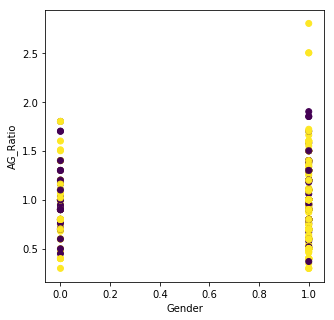

In [19]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(feature2, feature10, c=feature11)
plt.xlabel('Gender')
plt.ylabel('AG_Ratio')

plt.show()

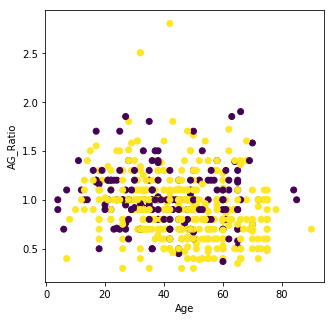

In [20]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(feature1, feature10, c=feature11)
plt.xlabel('Age')
plt.ylabel('AG_Ratio')

plt.show()

#### Plotting three features in 3D

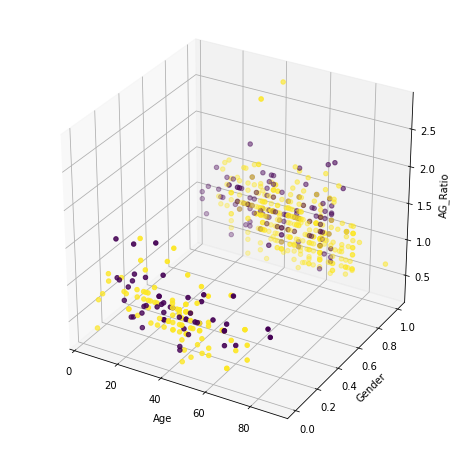

In [21]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature10, c=feature11)
ax.set_xlabel('Age')
ax.set_ylabel('Gender')
ax.set_zlabel('AG_Ratio')

plt.show()

#### Exploring relations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AC41A84208>,
      dtype=object)

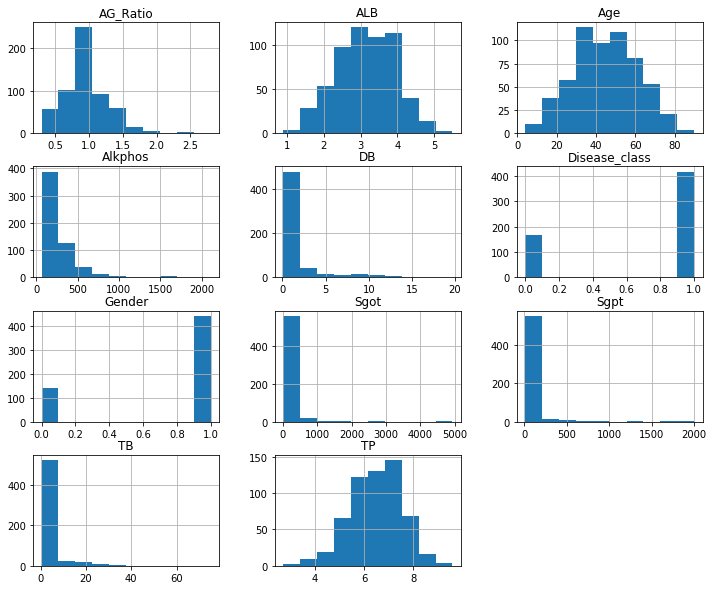

In [22]:
# Visualize feature distribution
%matplotlib inline 

df.hist(figsize=(12,10))

Age                 AxesSubplot(0.125,0.657941;0.168478x0.222059)
Gender           AxesSubplot(0.327174,0.657941;0.168478x0.222059)
TB               AxesSubplot(0.529348,0.657941;0.168478x0.222059)
DB               AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Alkphos             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Sgpt             AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Sgot             AxesSubplot(0.529348,0.391471;0.168478x0.222059)
TP               AxesSubplot(0.731522,0.391471;0.168478x0.222059)
ALB                    AxesSubplot(0.125,0.125;0.168478x0.222059)
AG_Ratio            AxesSubplot(0.327174,0.125;0.168478x0.222059)
Disease_class       AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

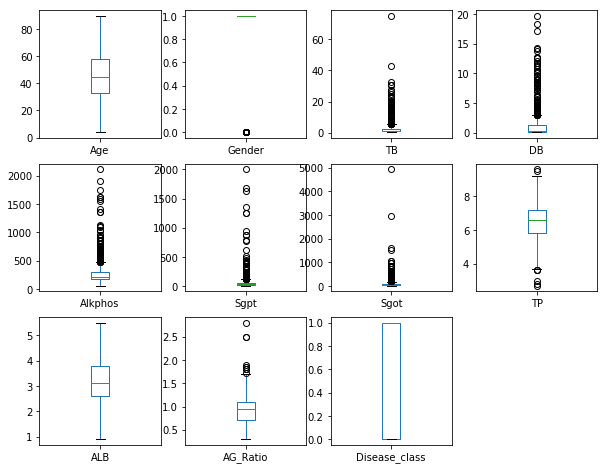

In [23]:
df.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,8))

In [24]:
df.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG_Ratio,Disease_class
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,0.246046
Alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.184866
Sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,0.163416
Sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,-0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,-0.161388
AG_Ratio,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,-0.162319


Text(0.5,1,'Correlation Matrix for ILPD')

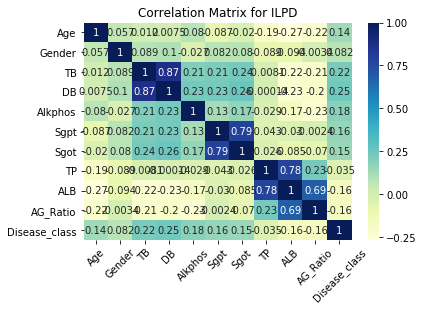

In [25]:
# The correlation between pairs of variables
# A basis for feature selection
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(18,12)
plt.title('Correlation Matrix for ILPD')

##  Partitioning a dataset in training and test sets

In [26]:
# Split testing and training sets 80/20
from sklearn.cross_validation import train_test_split

X, y = df.iloc[:, 0:10].values, df.iloc[:, -1:].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=0)

## Balancing data

In [27]:
X, y = df.iloc[:, 0:10].values, df.iloc[:, -1].values

In [28]:
# Show imbalance data
print ("instances:", y.size)
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 583
class label 0: 167
class label 1: 416


In [29]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12, ratio = 1.0)
X, y = sm.fit_sample(X, y)

print ("instances:", y.size)
print ("class label 0:", y[y==0].size)
print ("class label 1:", y[y==1].size)

instances: 832
class label 0: 416
class label 1: 416


C:\Users\BB\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(466, 10)
(117, 10)
(466, 1)
(117, 1)


## Bringing features onto the same scale

In [31]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

X_train_norm
X_test_norm

array([[0.59302326, 1.        , 0.01876676, ..., 0.49275362, 0.39130435,
        0.16      ],
       [0.65116279, 1.        , 0.10991957, ..., 0.68115942, 0.45652174,
        0.12      ],
       [0.39534884, 1.        , 0.0308311 , ..., 0.69565217, 0.7173913 ,
        0.36      ],
       ...,
       [0.36046512, 1.        , 0.01876676, ..., 0.55072464, 0.5       ,
        0.24      ],
       [0.26744186, 1.        , 0.0080429 , ..., 0.5942029 , 0.65217391,
        0.62      ],
       [0.70930233, 0.        , 0.00402145, ..., 0.65217391, 0.56521739,
        0.24      ]])

In [32]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_std
X_test_std

array([[ 0.61337158,  0.58561035, -0.22773839, ..., -0.33329742,
        -0.5397259 , -0.76862256],
       [ 0.92012319,  0.58561035,  0.84233486, ...,  0.83720447,
        -0.16931019, -1.07675611],
       [-0.42958391,  0.58561035, -0.08611104, ...,  0.92724308,
         1.31235268,  0.7720452 ],
       ...,
       [-0.61363488,  0.58561035, -0.22773839, ...,  0.02685701,
         0.07763362, -0.15235546],
       [-1.10443747,  0.58561035, -0.35362936, ...,  0.29697283,
         0.94193696,  2.77491329],
       [ 1.22687481, -1.70762009, -0.40083847, ...,  0.65712726,
         0.44804934, -0.15235546]])

## Selecting meaningful features

In [33]:
from sklearn.naive_bayes import GaussianNB

clf_bayes = GaussianNB()
clf_bayes.fit(X_train_std, y_train)
print('Test accuracy:', clf_bayes.score(X_test_std, y_test))

Test accuracy: 0.6068376068376068


C:\Users\BB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Sequential feature selection algorithms

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

C:\Users\BB\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


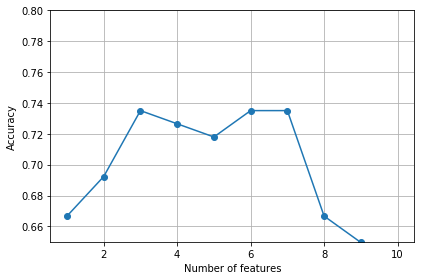

In [35]:
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=3)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.65, 0.8])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
 (0, 1, 2, 3, 4, 5, 6, 7, 8),
 (1, 2, 3, 4, 5, 6, 7, 8),
 (1, 2, 3, 4, 5, 6, 8),
 (1, 2, 3, 4, 6, 8),
 (1, 3, 4, 6, 8),
 (3, 4, 6, 8),
 (4, 6, 8),
 (4, 6),
 (4,)]

In [37]:
k3=list(sbs.subsets_[7])
k3

[4, 6, 8]

In [38]:
X_train=X_train[:,k3]

In [39]:
X_test=X_test[:,k3]

In [40]:
np.shape(X_train)

(466, 3)

In [41]:
feature_labels = df.columns[0:10]
feature_labels[k3]

Index(['Alkphos', 'Sgot', 'ALB'], dtype='object')

In [42]:
k6=list(sbs.subsets_[4])
k6

[1, 2, 3, 4, 6, 8]

In [43]:
feature_labels = df.columns[0:10]
feature_labels[k6]

Index(['Gender', 'TB', 'DB', 'Alkphos', 'Sgot', 'ALB'], dtype='object')

In [44]:
k7=list(sbs.subsets_[3])
k7

[1, 2, 3, 4, 5, 6, 8]

In [45]:
feature_labels = df.columns[0:10]
feature_labels[k7]

Index(['Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'ALB'], dtype='object')

## Dimensionality Reuction: Principal component analysis (PCA)

In [46]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca_std = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.27324059, 0.20290217, 0.14037758, 0.10827957, 0.09015039,
       0.07805594, 0.06505929, 0.02188444, 0.01421146, 0.00583857])

In [47]:
X_test_pca_std = pca.fit_transform(X_test_std)

In [48]:
np.shape(X_train_pca_std)

(466, 10)

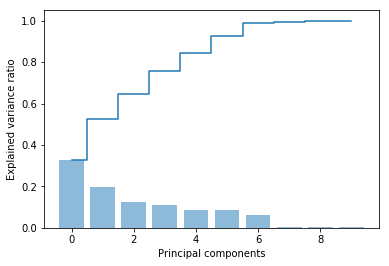

In [49]:
explained_variance_ratio_ = pca.explained_variance_ratio_[0:11]
plt.bar(np.arange(10), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(10), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [50]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([6.43323700e-01, 3.56672228e-01, 4.07224827e-06])

In [51]:
X_test_pca = pca.fit_transform(X_test)

In [52]:
np.shape(X_train_pca)

(466, 3)

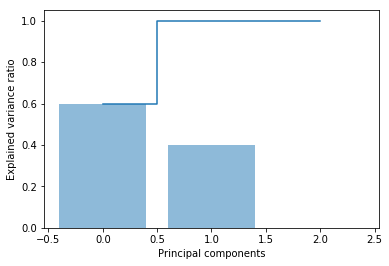

In [53]:
explained_variance_ratio_ = pca.explained_variance_ratio_[0:11]
plt.bar(np.arange(3), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(np.arange(3), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## Supervised machine learing models

In [76]:
#suppress warning 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [77]:
# import required stuff
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Decision Tree (DT)

In [78]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

### Training and visualizing

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [80]:
# Use a random 80-20 split of data for training and testing resp.
X_train_pca_std, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=1)
    
print ("number of instances for training: ", len(y_train))
print ("number of instances for test: ", len(y_test))

number of instances for training:  665
number of instances for test:  167


In [81]:
clf_dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf_dt.fit(X_train_pca_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Performance on training data

In [82]:
# predict values using the training data
dt_predict_train = clf_dt.predict(X_train_pca_std)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, dt_predict_train)))
print()

Accuracy: 0.7353



In [83]:
np.shape(X_train_pca_std)

(665, 10)

### Performance on testing data

In [84]:
# predict values using the testing data
dt_predict_test = clf_dt.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_predict_test)))

Accuracy: 0.6886


In [85]:
clf_dt.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')>

In [86]:
# Confusion matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

Confusion Matrix
[[51 29]
 [23 64]]


In [87]:
!pip install pydotplus

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [88]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

clf_DT = DecisionTreeClassifier(criterion = 'gini', max_depth=9, min_samples_split=2, random_state=42)
clf_DT.fit(X_train_pca_std, y_train)

names = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG_Ratio']
dot_data=StringIO()
dot_data = export_graphviz(clf_dt, out_file = None, feature_names=names, class_names=['non_liver_dis', 'liver_dis'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Support Vector Machine (SVM)

In [89]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_pca_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [90]:
prediction = model.predict(X_test)

In [91]:
prediction

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
print(confusion_matrix(y_test,prediction))

[[45 42]
 [ 1 79]]


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


pipe_svc = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=1)),
            ('clf', SVC())])

pipe_svc.fit(X_train_pca_std, y_train)
print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))
y_pred = pipe_svc.predict(X_test)

Test Accuracy: 0.695


In [95]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()),
                      ('pca', PCA(n_components=6)),
                    ('clf', SVC(random_state=1))])

param_range = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear']},
                 {'clf__C': param_range, 
                  'clf__gamma': param_range, 
                  'clf__kernel': ['rbf']}]


gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10)
gs = gs.fit(X_train_pca_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7819548872180451
{'clf__C': 100.0, 'clf__gamma': 1.0, 'clf__kernel': 'rbf'}


In [96]:
prediction = gs.predict(X_test)

In [97]:
# Confusion matrix
print(confusion_matrix(y_test,prediction))

[[75 12]
 [24 56]]


## Comparison between different classifiers

## Evaluate Algorithms: Baseline

In [98]:
# Spot-Check Algorithms
models = []

models.append(( 'DT' , DecisionTreeClassifier()))
models.append(( 'SVM' , SVC()))

In [99]:
from sklearn.dummy import DummyClassifier

#train a dummy classifier to make predictions based on the most_frequent class value
models.append(('Dummy', DummyClassifier(strategy="most_frequent")))

In [100]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train_pca_std)
seed = 7 
scoring = 'accuracy'

results = []
names = []
msg =str()

for name, model in models:
    kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_pca_std, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = msg + "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) + '\n'
   
print ('\n\n***results***')
print (msg)
print('->', num_folds, '-Fold cross-validation accurcay score for the training data for', len(models),'classifiers') 



***results***
DT: 0.753211 (0.036842)
SVM: 0.754862 (0.081690)
Dummy: 0.494731 (0.034374)

-> 10 -Fold cross-validation accurcay score for the training data for 3 classifiers


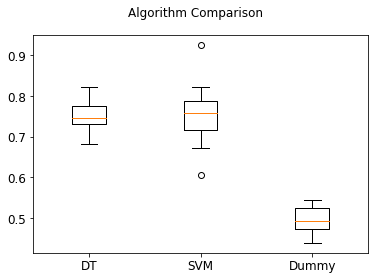

In [101]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [102]:
# Standardize the dataset
pipelines = []

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=1)),
                     ('clf', SVC(probability=True, verbose=False))])

pipe_DT = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=1)),
                     ('clf', DecisionTreeClassifier())])


pipelines.append(( 'ScaledSVM' , pipe_svc))
pipelines.append(( 'ScaledDT' , pipe_DT))

In [103]:
pipe_Dummy = Pipeline([('scl', StandardScaler()),
                     ('clf', DummyClassifier(strategy="most_frequent"))])

pipelines.append(( 'ScaledDummy', pipe_Dummy))

In [104]:
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train_pca_std, y_train, cv=kfold,
      scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledSVM: 0.702329 (0.054488)
ScaledDT: 0.588218 (0.062903)
ScaledDummy: 0.494731 (0.034374)


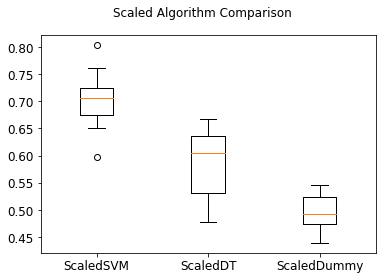

In [105]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( 'Scaled Algorithm Comparison' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## K-fold cross-validation

In [106]:
import numpy as np
from sklearn.cross_validation import StratifiedKFold

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_svc.fit(X_train_pca_std[train], y_train[train])
    score = pipe_svc.score(X_train_pca_std[test], y_train[test])
    scores.append(score)
    #print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


CV accuracy: 0.705 +/- 0.048


In [107]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_svc, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

ValueError: Found input variables with inconsistent numbers of samples: [466, 665]

## Algorithm Tuning

### Tuning the hyper-parameters-DT

In [84]:
# Make Support Vector Classifier Pipeline
pipe_DT = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=1)),
                     ('clf', DecisionTreeClassifier())])

#Fit Pipeline to training Data
pipe_DT.fit(X_train_pca_std, y_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_DT, X=X_train_pca_std, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
sample_split_range = list(range(2, 50))
max_depth = np.arange(3, 15)
param_grid = [{'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['gini']},
              {'clf__min_samples_split' : sample_split_range, 'clf__max_depth' : max_depth, 'clf__criterion' : ['entropy']}
               ]

gs_DT = GridSearchCV(pipe_DT, 
                    param_grid, 
                    cv=kfold, 
                    scoring='accuracy',
                    n_jobs=1)
gs_DT.fit(X_train_pca_std, y_train)
print('--> Tuned Parameters Best Score: ',gs_DT.best_score_)
print('--> Best Parameters: \n',gs_DT.best_params_)

--> Model Training Accuracy: 0.605 +/- 0.055
--> Tuned Parameters Best Score:  0.687218045112782
--> Best Parameters: 
 {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}


### Tuning the hyper-parameters- SVC

In [85]:
# Make Support Vector Classifier Pipeline
pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=1)),
                     ('clf', SVC(probability=True, verbose=False))])

#Fit Pipeline to training Data
pipe_svc.fit(X_train_pca_std, y_train)

#print('--> Fitted Pipeline to training Data')

scores = cross_val_score(estimator=pipe_svc, X=X_train_pca_std, y=y_train, cv=num_folds, n_jobs=1, verbose=0)
print('--> Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

#Tune Hyperparameters
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range,'clf__kernel': ['linear']},
              {'clf__C': param_range,'clf__gamma': param_range,
               'clf__kernel': ['rbf']}]

gs_svc = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=kfold,
                  n_jobs=1)
gs_svc = gs_svc.fit(X_train_pca_std, y_train)
print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
print('--> Best Parameters: \n',gs_svc.best_params_)

--> Model Training Accuracy: 0.705 +/- 0.048
--> Tuned Parameters Best Score:  0.7097744360902256
--> Best Parameters: 
 {'clf__C': 10.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}


## Finalize Model and some evaluation statistic

### Finalize Model-DT

In [88]:
#Use best parameters
clf_DT = gs_DT.best_estimator_

#Get Final Scores
clf_DT.fit(X_train_pca_std, y_train)
scores = cross_val_score(estimator=clf_DT,
                         X=X_train_pca_std,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)

print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_DT.score(X_test,y_test))

--> Final Model Training Accuracy: 0.692 +/- 0.054
--> Final Accuracy on Test set: 0.71257


Confusion Matrix:


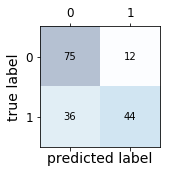

0.7125748502994012
[[75 12]
 [36 44]]
             precision    recall  f1-score   support

        0.0       0.68      0.86      0.76        87
        1.0       0.79      0.55      0.65        80

avg / total       0.73      0.71      0.70       167



In [89]:
clf_DT.fit(X_train_pca_std, y_train)
y_pred = clf_DT.predict(X_test)

print('Confusion Matrix:')
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Finalize Model-SVC

In [90]:
#Use best parameters
clf_svc = gs_svc.best_estimator_

#Get Final Scores
clf_svc.fit(X_train_pca_std, y_train)
scores = cross_val_score(estimator=clf_svc,
                         X=X_train_pca_std,
                         y=y_train,
                         cv=num_folds,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svc.score(X_test,y_test))


--> Final Model Training Accuracy: 0.710 +/- 0.041
--> Final Accuracy on Test set: 0.69461


Confusion Matrix:


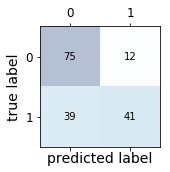

0.6946107784431138
[[75 12]
 [39 41]]
             precision    recall  f1-score   support

        0.0       0.66      0.86      0.75        87
        1.0       0.77      0.51      0.62        80

avg / total       0.71      0.69      0.68       167



In [91]:
clf_svc.fit(X_train_pca_std, y_train)
y_pred = clf_svc.predict(X_test)

print('Confusion Matrix:')
confmat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
plt.show()

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### ROC

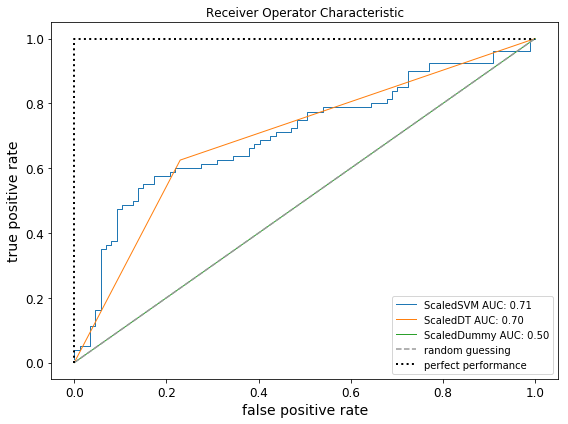

In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp

fig = plt.figure(figsize=(8, 6))
all_tpr = []

for name, model in pipelines:
      
    model.fit(X_train_pca_std, y_train)
    
    probas = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    current_auc = str('%.2f' %roc_auc)
    
    plt.plot(fpr, 
             tpr, 
             lw=1, 
             label= str(name + ' AUC: ' + current_auc))

plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

## Sensitive analysis

In [118]:
def explore(sigmoid_c):
    for i in sigmoid_c:
        svm=SVC(C=i, kernel='sigmoid')
        scores = cross_val_score(estimator=svm,X=X_train_pca_std,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

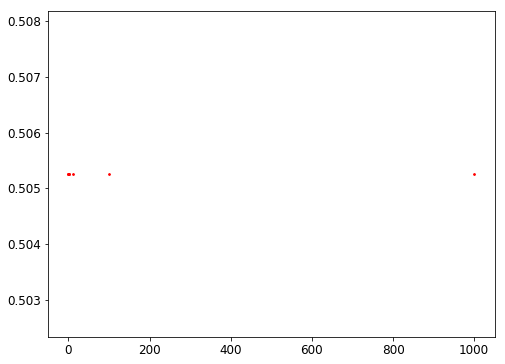

In [119]:
plt.figure(figsize=(8,6))
sigmoid_c =[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(sigmoid_c)

In [127]:
def explore(linear_c):
    for i in linear_c:
        svm=SVC(C=i,kernel='linear')
        scores = cross_val_score(estimator=svm,X=X_train_pca_std,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

Text(0.5,0,' parameter C ')

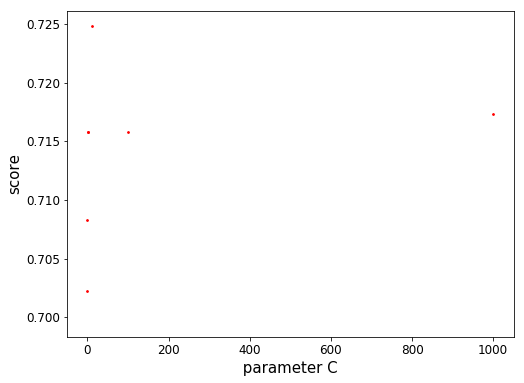

In [128]:
plt.figure(figsize=(8,6))
linear_c = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(linear_c)
plt.ylabel('score',size=15)
plt.xlabel(' parameter C ',size=15)